# SI 618: Final Project
## Sanghyun Lee (shleec)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import scipy as sp
import re
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn import metrics
import os
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
citi17 = pd.read_csv("data/2017-citibike-tripdata.csv")
citi18 = pd.read_csv("data/2018-citibike-tripdata.csv")

In [4]:
citi17 = citi17.drop(['Unnamed: 0'], axis=1)
citi17.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender
0,272,2017-01-05 09:05:25,2017-01-05 09:09:57,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,26271,Subscriber,NaN,0
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2


In [5]:
citi17.shape

(29498, 15)

In [6]:
citi18 = citi18.drop(['Unnamed: 0'], axis=1)
citi18.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender
0,271,2018-01-20 10:19:03.2370,2018-01-20 10:23:35.0140,3185,City Hall,40.717732,-74.043845,3187,Warren St,40.721124,-74.038051,31920,Subscriber,1984,1
1,3186,2018-01-29 12:28:38.4070,2018-01-29 13:21:45.1890,3187,Warren St,40.721124,-74.038051,3187,Warren St,40.721124,-74.038051,29588,Subscriber,1984,1
2,87,2018-01-27 20:21:21.6140,2018-01-27 20:22:48.7570,3279,Dixon Mills,40.721630,-74.049968,3209,Brunswick St,40.724176,-74.050656,31925,Subscriber,1982,1
3,290,2018-01-11 17:09:41.6910,2018-01-11 17:14:31.8990,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,31908,Subscriber,1977,1
4,65,2018-01-02 13:35:27.3630,2018-01-02 13:36:33.1720,3187,Warren St,40.721124,-74.038051,3187,Warren St,40.721124,-74.038051,29655,Subscriber,1953,1


In [7]:
citi18.shape

(35394, 15)

### <font color="magenta">1. How are rides different between Citi Bike customers and subscribers from 2017 to 2018?

In [8]:
citi17.usertype.value_counts()

Subscriber    27846
Customer       1639
Name: usertype, dtype: int64

In [9]:
citi18.usertype.value_counts()

Subscriber    33179
Customer       2215
Name: usertype, dtype: int64

In [10]:
citi17_sub = citi17[(citi17['usertype'] == 'Subscriber')]
citi17_cus = citi17[(citi17['usertype'] == 'Customer')]

citi18_sub = citi18[(citi18['usertype'] == 'Subscriber')]
citi18_cus = citi18[(citi18['usertype'] == 'Customer')]


In [11]:
len(citi17_sub) / len(citi17_cus)

16.989627821842586

In [12]:
len(citi18_sub) / len(citi18_cus)

14.97923250564334

In [13]:
citi17_sub.gender.value_counts()

1    21212
2     5898
0      736
Name: gender, dtype: int64

In [14]:
citi17_cus.gender.value_counts()

0    1371
1     165
2     103
Name: gender, dtype: int64

In [15]:
citi18_sub.gender.value_counts()

1    25128
2     7196
0      855
Name: gender, dtype: int64

In [16]:
citi18_cus.gender.value_counts()

0    1285
1     559
2     371
Name: gender, dtype: int64

In [17]:
citi17.groupby(['usertype','gender']).mean()

tripdur  start_st_id  start_st_lat  start_st_long  \
usertype   gender                                                          
Customer   0       4500.155361  3215.326769     40.720926     -74.045299   
           1       3363.169697  3219.648485     40.722327     -74.046114   
           2       1452.087379  3226.155340     40.721068     -74.045385   
Subscriber 0        657.603261  3227.525815     40.721450     -74.041801   
           1        514.121346  3221.023053     40.722632     -74.046031   
           2        587.026450  3225.514242     40.722138     -74.046335   

                     end_st_id  end_st_lat  end_st_long        bikeid  \
usertype   gender                                                       
Customer   0       3201.384391   40.423632   -73.504619  28287.283735   
           1       3213.781818   40.474635   -73.596375  28651.545455   
           2       3201.766990   39.139424   -71.169935  28622.262136   
Subscriber 0       3226.350543   40.665858   -73.941020  28277.024457   
           1       3219.081558   40.608839   -73.839567  28296.811003   
           2       3220.836046   40.666439   -73.945069  28320.194303   

                    birth year  
usertype   gender               
Customer   0       1985.000000  
           1       1983.884848  
           2       1983.737864  
Subscriber 0       1975.307018  
           1       1979.627334  
           2       1980.712445

In [18]:
citi18.groupby(['usertype','gender']).mean()

tripdur  start_st_id  start_st_lat  start_st_long  \
usertype   gender                                                          
Customer   0       3702.510506  3262.445136     40.720987     -74.045506   
           1       2257.245081  3286.266547     40.722533     -74.044862   
           2       1781.102426  3271.614555     40.722031     -74.045594   
Subscriber 0        483.495906  3273.787135     40.721460     -74.043565   
           1        504.647763  3263.230540     40.722744     -74.046073   
           2        561.468872  3262.932879     40.722963     -74.046384   

                     end_st_id  end_st_lat  end_st_long        bikeid  \
usertype   gender                                                       
Customer   0       3254.929961   40.720841   -74.044677  29220.400000   
           1       3267.899821   40.721727   -74.044703  29256.116279   
           2       3262.690027   40.721563   -74.045943  29020.212938   
Subscriber 0       3269.162573   40.721348   -74.043282  29409.149708   
           1       3258.122453   40.722289   -74.045654  29475.974530   
           2       3258.258894   40.722629   -74.045604  29315.111173   

                    birth year  
usertype   gender               
Customer   0       1969.148638  
           1       1986.792487  
           2       1987.064690  
Subscriber 0       1970.704094  
           1       1980.659105  
           2       1981.696498

In [19]:
citi18.groupby(['usertype','gender']).sum()

tripdur  start_st_id  start_st_lat  start_st_long  \
usertype   gender                                                       
Customer   0        4757726      4192242  5.232647e+04  -9.514848e+04   
           1        1261800      1837023  2.276390e+04  -4.139108e+04   
           2         660789      1213769  1.510787e+04  -2.747092e+04   
Subscriber 0         413389      2799088  3.481685e+04  -6.330725e+04   
           1       12680789     81998457  1.023281e+06  -1.860630e+06   
           2        4040330     23480065  2.930424e+05  -5.328378e+05   

                   end_st_id    end_st_lat   end_st_long     bikeid  \
usertype   gender                                                     
Customer   0         4182585  5.232628e+04 -9.514741e+04   37548214   
           1         1826756  2.276345e+04 -4.139099e+04   16354169   
           2         1210458  1.510770e+04 -2.747104e+04   10766499   
Subscriber 0         2795134  3.481675e+04 -6.330701e+04   25144823   
           1        81870101  1.023270e+06 -1.860619e+06  740672288   
           2        23446431  2.930400e+05 -5.328322e+05  210951540   

                   birth year  
usertype   gender              
Customer   0          2530356  
           1          1110617  
           2           737201  
Subscriber 0          1684952  
           1         49770002  
           2         14260288

In [20]:
citi17['starttime'] = pd.to_datetime(citi17['starttime'])
citi17['month'] = citi17['starttime'].dt.month

citi18['starttime'] = pd.to_datetime(citi18['starttime'])
citi18['month'] = citi18['starttime'].dt.month

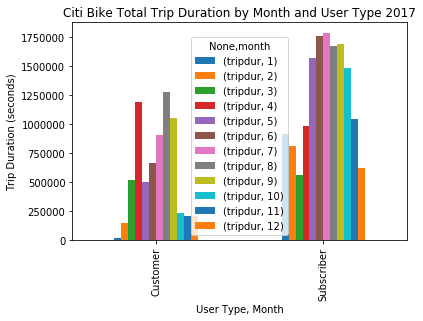

In [31]:
user_tripdur_17 = citi17.groupby(['usertype','month']).sum().drop(['start_st_id',
                                                               'start_st_lat',
                                                               'start_st_long',
                                                               'end_st_id',
                                                               'end_st_lat',
                                                               'end_st_long',
                                                               'bikeid',
                                                               'birth year',
                                                               'gender'], axis=1).unstack().plot.bar()
user_tripdur_17.set_title('Citi Bike Total Trip Duration by Month and User Type 2017')
plt.xlabel('User Type, Month')
plt.ylabel('Trip Duration (seconds)')
user_tripdur_17
fig = user_tripdur_17.get_figure()
fig.savefig("user_tripdur_17.jpg")

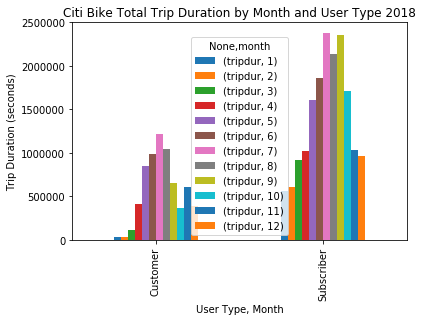

In [32]:
user_tripdur_18 = citi18.groupby(['usertype','month']).sum().drop(['start_st_id',
                                                               'start_st_lat',
                                                               'start_st_long',
                                                               'end_st_id',
                                                               'end_st_lat',
                                                               'end_st_long',
                                                               'bikeid',
                                                               'birth year',
                                                               'gender'], axis=1).unstack().plot.bar()
user_tripdur_18.set_title('Citi Bike Total Trip Duration by Month and User Type 2018')
plt.xlabel('User Type, Month')
plt.ylabel('Trip Duration (seconds)')
user_tripdur_18
fig = user_tripdur_18.get_figure()
fig.savefig("user_tripdur_18.jpg")

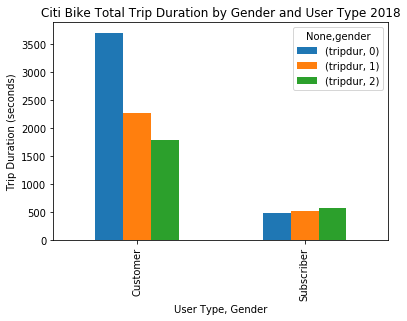

In [23]:
user_tripdur_18 = citi18.groupby(['usertype','gender']).mean().drop(['start_st_id',
                                                               'start_st_lat',
                                                               'start_st_long',
                                                               'end_st_id',
                                                               'end_st_lat',
                                                               'end_st_long',
                                                               'bikeid',
                                                               'birth year',
                                                               'month'], axis=1).unstack().plot.bar()
user_tripdur_18.set_title('Citi Bike Total Trip Duration by Gender and User Type 2018')
plt.xlabel('User Type, Gender')
plt.ylabel('Trip Duration (seconds)')
user_tripdur_18
fig = user_tripdur_18.get_figure()
fig.savefig("user_tripdur_18.jpg")

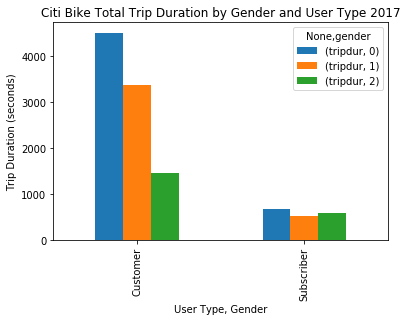

In [24]:
user_tripdur_17 = citi17.groupby(['usertype','gender']).mean().drop(['start_st_id',
                                                               'start_st_lat',
                                                               'start_st_long',
                                                               'end_st_id',
                                                               'end_st_lat',
                                                               'end_st_long',
                                                               'bikeid',
                                                               'birth year',
                                                               'month'], axis=1).unstack().plot.bar()
user_tripdur_17.set_title('Citi Bike Total Trip Duration by Gender and User Type 2017')
plt.xlabel('User Type, Gender')
plt.ylabel('Trip Duration (seconds)')
user_tripdur_17
fig = user_tripdur_17.get_figure()
fig.savefig("user_tripdur_17.jpg")

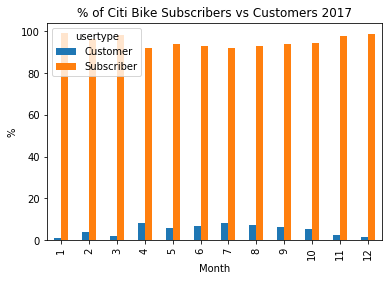

In [25]:
usrtype_ratio_17 = citi17.groupby(['month','usertype']).size().groupby(level=0).apply(lambda d: 100 * d / d.sum()).unstack().plot.bar()
usrtype_ratio_17.set_title('% of Citi Bike Subscribers vs Customers 2017')
plt.xlabel('Month')
plt.ylabel('%')
usrtype_ratio_17
fig = usrtype_ratio_17.get_figure()
fig.savefig("usrtype_ratio_17.jpg")

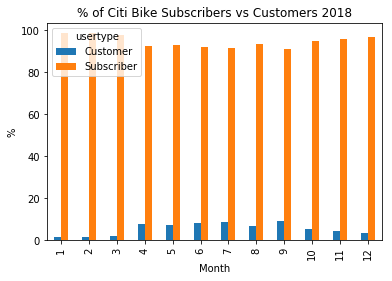

In [26]:
usrtype_ratio_18 = citi18.groupby(['month','usertype']).size().groupby(level=0).apply(lambda d: 100 * d / d.sum()).unstack().plot.bar()
usrtype_ratio_18.set_title('% of Citi Bike Subscribers vs Customers 2018')
plt.xlabel('Month')
plt.ylabel('%')
usrtype_ratio_18
fig = usrtype_ratio_18.get_figure()
fig.savefig("usrtype_ratio_18.jpg")


### <font color="magenta">2. Which was the most popular route (start to end station) for the last two years?

In [25]:
citi17[['start_st_name','end_st_name']].head()

,start_st_name,end_st_name
0,McGinley Square,Sip Ave
1,Newport PATH,Hamilton Park
2,Grove St PATH,Liberty Light Rail
3,5 Corners Library,Heights Elevator
4,Newport PATH,Hamilton Park


In [26]:
citi17.corr()

,tripdur,start_st_id,start_st_lat,start_st_long,end_st_id,end_st_lat,end_st_long,bikeid,birth year,gender,month
tripdur,1.000000,-0.004917,0.002925,-0.010630,-0.003261,-0.037735,0.037671,-0.017741,-0.011157,-0.061227,-0.013696
start_st_id,-0.004917,1.000000,-0.037128,0.017702,0.010840,0.006570,-0.006362,0.074522,0.010957,0.029408,0.123197
start_st_lat,0.002925,-0.037128,1.000000,-0.219507,-0.006277,-0.021796,0.022704,-0.002622,0.003230,0.008501,-0.002532
start_st_long,-0.010630,0.017702,-0.219507,1.000000,0.055944,-0.002038,0.002715,0.008174,-0.020708,-0.039122,0.027632
end_st_id,-0.003261,0.010840,-0.006277,0.055944,1.000000,-0.096895,0.096633,0.061988,-0.001287,0.020502,0.093175
end_st_lat,-0.037735,0.006570,-0.021796,-0.002038,-0.096895,1.000000,-0.999993,-0.005373,-0.003398,0.012601,-0.030427
end_st_long,0.037671,-0.006362,0.022704,0.002715,0.096633,-0.999993,1.000000,0.005412,0.003396,-0.012655,0.030486
bikeid,-0.017741,0.074522,-0.002622,0.008174,0.061988,-0.005373,0.005412,1.000000,0.009528,0.004283,0.558005
birth year,-0.011157,0.010957,0.003230,-0.020708,-0.001287,-0.003398,0.003396,0.009528,1.000000,0.049202,0.009934
gender,-0.061227,0.029408,0.008501,-0.039122,0.020502,0.012601,-0.012655,0.004283,0.049202,1.000000,0.016322


In [27]:
citi17['trip'] = (citi17['start_st_name'] + " / "+ citi17['end_st_name'])
citi17['trip'].value_counts()[:10]

Hamilton Park / Grove St PATH      721
Morris Canal / Exchange Place      576
Grove St PATH / Hamilton Park      546
Exchange Place / Morris Canal      405
Van Vorst Park / Grove St PATH     390
Brunswick St / Grove St PATH       376
Jersey & 6th St / Grove St PATH    349
McGinley Square / Sip Ave          338
Dixon Mills / Grove St PATH        317
Sip Ave / McGinley Square          288
Name: trip, dtype: int64

In [28]:
citi18['trip'] = (citi18['start_st_name'] + " / "+ citi18['end_st_name'])
citi18['trip'].value_counts()[:10]

Hamilton Park / Grove St PATH       767
Grove St PATH / Hamilton Park       597
Brunswick & 6th / Grove St PATH     471
Morris Canal / Exchange Place       422
Jersey & 6th St / Grove St PATH     395
Brunswick St / Grove St PATH        356
Marin Light Rail / Grove St PATH    343
Grove St PATH / Marin Light Rail    331
Grove St PATH / Brunswick & 6th     328
Exchange Place / Morris Canal       318
Name: trip, dtype: int64

In [29]:
route_18 = pd.crosstab(citi18.start_st_id, citi18.end_st_id)
route_18.head()

end_st_id,167,304,327,422,426,486,514,534,3183,3184,...,3539,3541,3638,3639,3640,3677,3678,3679,3681,3694
start_st_id,,,,,,,,,,,,,,,,,,,,,
3183,0,0,0,0,0,0,0,0,61,77,...,0,1,49,86,5,3,0,0,40,1
3184,0,0,0,0,0,0,0,0,69,36,...,0,0,27,35,8,1,1,0,25,3
3185,0,0,0,0,0,0,0,0,64,24,...,1,0,13,13,4,3,1,3,26,1
3186,0,0,0,0,1,0,0,0,88,35,...,0,0,16,67,5,1,8,3,50,1
3187,0,0,0,0,0,0,0,1,118,22,...,0,0,27,46,3,0,2,0,25,0


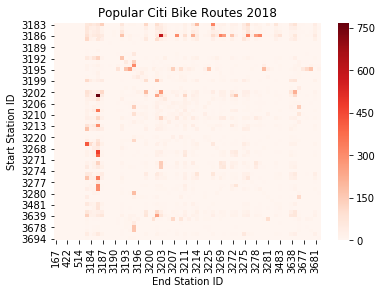

In [30]:
heatmap_18 = sns.heatmap(route_18, cmap="Reds")
heatmap_18.set_title('Popular Citi Bike Routes 2018')
plt.xlabel('End Station ID')
plt.ylabel('Start Station ID')
heatmap_18
fig = heatmap_18.get_figure()
fig.savefig("heatmap_18.jpg")

In [31]:
route_17 = pd.crosstab(citi17.start_st_id, citi17.end_st_id)
route_17.head()

end_st_id,152,212,238,267,304,313,319,327,423,439,...,3281,3426,3436,3442,3474,3480,3481,3638,3639,3640
start_st_id,,,,,,,,,,,,,,,,,,,,,
3183,0,0,0,0,1,0,0,0,0,1,...,19,3,0,1,0,8,6,5,14,1
3184,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,9,5,13,2
3185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,1,0
3186,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,4,11,11,15,1
3187,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,2,10,4,8,0


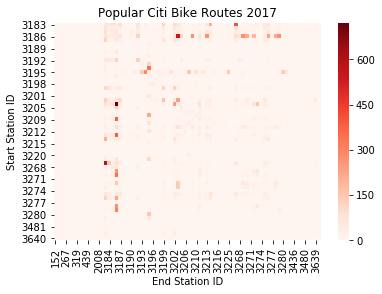

In [32]:
heatmap_17 = sns.heatmap(route_17, cmap="Reds")
heatmap_17.set_title('Popular Citi Bike Routes 2017')
plt.xlabel('End Station ID')
plt.ylabel('Start Station ID')
heatmap_17

fig = heatmap_17.get_figure()
fig.savefig("heatmap_17.jpg")

### <font color="magenta">3. Which station was the most popular destination from 2017 to 2018?

In [33]:
citi = pd.concat([citi17, citi18])
citi.shape

(64892, 17)

In [34]:
citi.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender,month,trip
0,272,2017-01-05 09:05:25,2017-01-05 09:09:57,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,26271,Subscriber,NaN,0,1,McGinley Square / Sip Ave
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1,1,Grove St PATH / Liberty Light Rail
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1,1,5 Corners Library / Heights Elevator
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park


In [35]:
citi["end_st_lat"] = citi["end_st_lat"].replace(0, np.NaN)
citi["end_st_long"] = citi["end_st_long"].replace(0, np.NaN)

In [36]:
(citi.end_st_lat == 0).value_counts()

False    64892
Name: end_st_lat, dtype: int64

In [37]:
citi = citi.dropna()

In [38]:
citi_1718 = citi.copy()

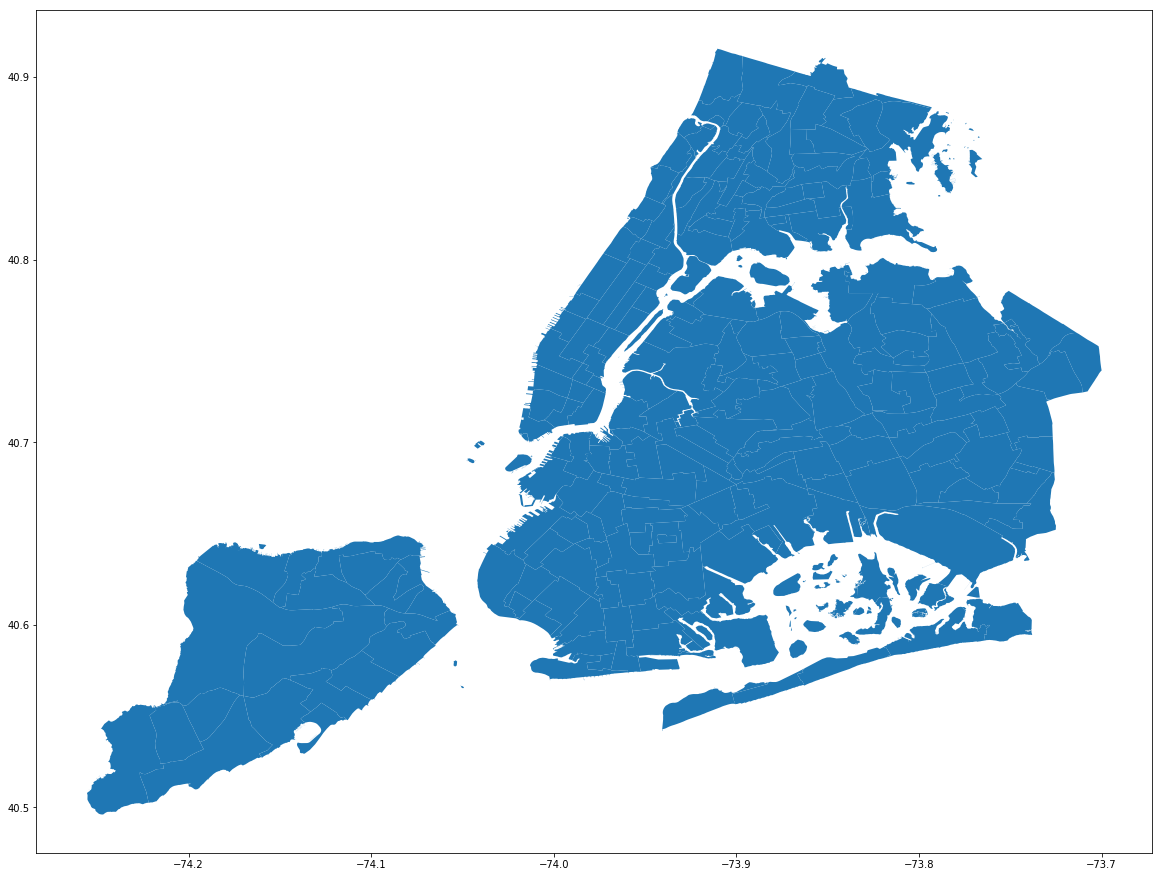

In [39]:
nycmap = gpd.read_file('data/nycmap.shp')
fig,ax = plt.subplots(figsize=(20,20))
nycmap.plot(ax = ax)

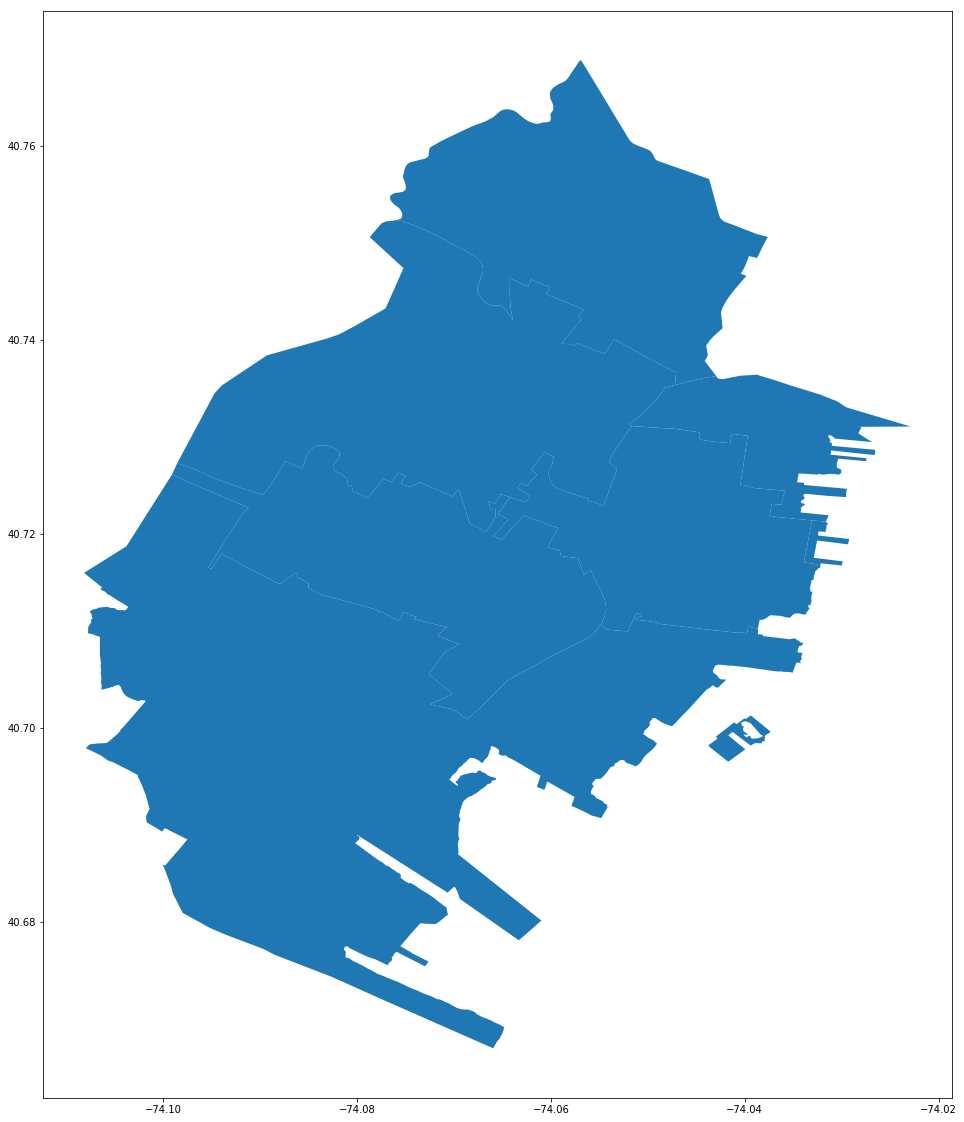

In [40]:
jcmap = gpd.read_file('data/jersey-city-map.shp')
fig,ax = plt.subplots(figsize=(20,20))
jcmap.plot(ax = ax)

In [41]:
crs = {'init': 'epsg:4326'}
citi_1718.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender,month,trip
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1,1,Grove St PATH / Liberty Light Rail
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1,1,5 Corners Library / Heights Elevator
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park
5,364,2017-01-25 09:43:47,2017-01-25 09:49:51,3203,Hamilton Park,40.727596,-74.044247,3185,City Hall,40.717732,-74.043845,24581,Subscriber,1978.0,1,1,Hamilton Park / City Hall


In [42]:
geo = [Point(xy) for xy in zip(citi_1718['end_st_long'], citi_1718['end_st_lat'])]


In [43]:
geo_df = gpd.GeoDataFrame(citi_1718,
                          crs = crs,
                          geometry = geo)
geo_df.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender,month,trip,geometry
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park,POINT (-74.04424731100001 40.727595966)
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1,1,Grove St PATH / Liberty Light Rail,POINT (-74.0557013 40.7112423)
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1,1,5 Corners Library / Heights Elevator,POINT (-74.04044330120088 40.74871594538023)
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park,POINT (-74.04424731100001 40.727595966)
5,364,2017-01-25 09:43:47,2017-01-25 09:49:51,3203,Hamilton Park,40.727596,-74.044247,3185,City Hall,40.717732,-74.043845,24581,Subscriber,1978.0,1,1,Hamilton Park / City Hall,POINT (-74.04384499999998 40.7177325)


In [44]:
citi.tripdur.unique()

array([ 408,  472, 1469, ..., 2037, 2675, 2647])

In [45]:
val = pd.Series(citi.end_st_name.value_counts())

In [46]:
citi.columns

Index(['tripdur', 'starttime', 'stoptime', 'start_st_id', 'start_st_name',
       'start_st_lat', 'start_st_long', 'end_st_id', 'end_st_name',
       'end_st_lat', 'end_st_long', 'bikeid', 'usertype', 'birth year',
       'gender', 'month', 'trip'],
      dtype='object')

In [47]:
dest = citi.drop(['starttime', 
                  'stoptime', 
                  'start_st_id', 
                  'start_st_name',
                  'start_st_lat', 
                  'start_st_long', 
                  'end_st_id', 
                  'bikeid', 
                  'usertype', 
                  'birth year',
                  'gender', 
                  'month', 
                  'trip'], axis=1)
dest.head()

,tripdur,end_st_name,end_st_lat,end_st_long
1,408,Hamilton Park,40.727596,-74.044247
2,472,Liberty Light Rail,40.711242,-74.055701
3,1469,Heights Elevator,40.748716,-74.040443
4,404,Hamilton Park,40.727596,-74.044247
5,364,City Hall,40.717732,-74.043845


In [48]:
dest4 = pd.DataFrame(dest.end_st_name.value_counts())
dest4 = dest4.reset_index()
dest4.columns = (['end_st_name', 'trip_num'])
dest4

,end_st_name,trip_num
0,Grove St PATH,9199
1,Exchange Place,4635
2,Hamilton Park,3572
3,Sip Ave,3014
4,Newport PATH,2857
5,Morris Canal,1830
6,Warren St,1799
7,Marin Light Rail,1777
8,City Hall,1775
9,Newark Ave,1758


In [49]:
dest2 = pd.DataFrame(dest.groupby('end_st_name').mean()['end_st_lat'])
dest2 = dest2.reset_index()
dest3 = pd.DataFrame(dest.groupby('end_st_name').mean()['end_st_long'])
dest3 = dest3.reset_index()

In [50]:
dest1 = pd.DataFrame(dest.groupby('end_st_name').sum().tripdur)
dest1 = dest1.reset_index()
dest1 = pd.merge(dest1, dest2, how='left', on='end_st_name')
dest1 = pd.merge(dest1, dest3, how='left', on='end_st_name')
dest1 = pd.merge(dest1, dest4, how='left', on='end_st_name')
dest1

,end_st_name,tripdur,end_st_lat,end_st_long,trip_num
0,12 Ave & W 40 St,4081,40.760875,-74.002777,1
1,5 Corners Library,273305,40.734961,-74.059503,351
2,6 Ave & Spring St,2543,40.725256,-74.004121,1
3,Amsterdam Ave & W 125 St,19175,40.813358,-73.956461,1
4,Astor Place,291127,40.719282,-74.071262,519
5,Baldwin at Montgomery,334605,40.723659,-74.064194,622
6,Bayside Park,29959,40.698651,-74.082080,18
7,Bergen Ave,145769,40.722104,-74.071455,222
8,Bethune Center,5969,40.704958,-74.085931,5
9,Broadway & Battery Pl,8642,40.704633,-74.013617,3


In [51]:
dest1.max()

end_st_name    York St
tripdur        4179794
end_st_lat     40.8134
end_st_long   -73.9565
trip_num          9199
dtype: object

In [52]:
dest1[dest1.trip_num == 9199]

,end_st_name,tripdur,end_st_lat,end_st_long,trip_num
32,Grove St PATH,4179794,40.719586,-74.043117,9199


Text(0.5, 1.0, 'Number of Trips to End Stations 2017-2018')

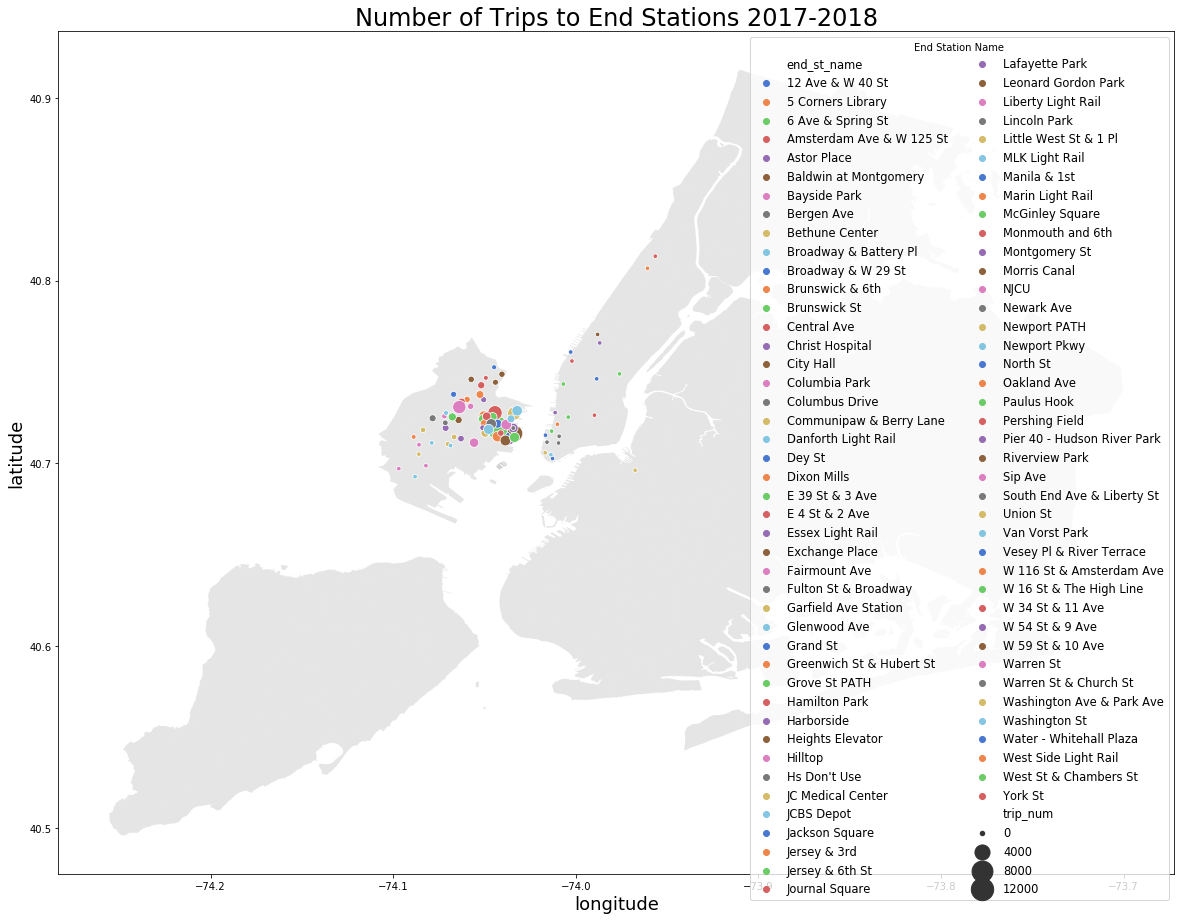

In [62]:
fig,ax = plt.subplots(figsize=(20,20))
nycmap.plot(ax=ax, alpha = 0.2, color ='grey')
jcmap.plot(ax=ax, alpha = 0.2, color ='grey')
sns.scatterplot(x="end_st_long", 
                y="end_st_lat", 
                hue="end_st_name", 
                size=dest1.trip_num,
                 sizes=(20, 500), 
                alpha=1, 
                palette="muted", 
                data=dest1)
plt.legend(title='End Station Name', ncol=2, fontsize=11.5)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.title('Number of Trips to End Stations 2017-2018', fontsize=24)


# fig = heatmap_17.get_figure()
# fig.savefig("heatmap_17.jpg")

### <font color="magenta">4. Find out what features distinguish the Citibike subscribers and predict which user type it is using current data.

In [55]:
citi17.shape

(29498, 17)

In [56]:
citi18.shape

(35394, 17)

In [57]:
citi.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender,month,trip
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1,1,Grove St PATH / Liberty Light Rail
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1,1,5 Corners Library / Heights Elevator
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park
5,364,2017-01-25 09:43:47,2017-01-25 09:49:51,3203,Hamilton Park,40.727596,-74.044247,3185,City Hall,40.717732,-74.043845,24581,Subscriber,1978.0,1,1,Hamilton Park / City Hall


In [58]:
citi['starttime'] = pd.to_datetime(citi['starttime'])
citi['year'] = citi['starttime'].dt.year
citi['hour'] = citi['starttime'].dt.hour
citi.year.unique()

array([2017, 2018])

In [59]:
citi.hour.unique()

array([23, 14, 15, 21,  9,  7, 18,  6, 16, 17, 19,  8, 12,  0, 22, 10, 20,
        5, 13,  4, 11,  1,  3,  2])

In [60]:
citi.head()

,tripdur,starttime,stoptime,start_st_id,start_st_name,start_st_lat,start_st_long,end_st_id,end_st_name,end_st_lat,end_st_long,bikeid,usertype,birth year,gender,month,trip,year,hour
1,408,2017-01-12 23:47:52,2017-01-12 23:54:41,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24461,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park,2017,23
2,472,2017-01-18 14:42:45,2017-01-18 14:50:38,3186,Grove St PATH,40.719586,-74.043117,3192,Liberty Light Rail,40.711242,-74.055701,24389,Subscriber,1973.0,1,1,Grove St PATH / Liberty Light Rail,2017,14
3,1469,2017-01-21 15:01:44,2017-01-21 15:26:13,3220,5 Corners Library,40.734961,-74.059503,3198,Heights Elevator,40.748716,-74.040443,26263,Subscriber,1988.0,1,1,5 Corners Library / Heights Elevator,2017,15
4,404,2017-01-11 21:22:23,2017-01-11 21:29:08,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,26232,Subscriber,1987.0,2,1,Newport PATH / Hamilton Park,2017,21
5,364,2017-01-25 09:43:47,2017-01-25 09:49:51,3203,Hamilton Park,40.727596,-74.044247,3185,City Hall,40.717732,-74.043845,24581,Subscriber,1978.0,1,1,Hamilton Park / City Hall,2017,9


In [61]:
citi.start_st_id.unique()

array([3202, 3186, 3220, 3203, 3200, 3183, 3270, 3275, 3184, 3267, 3276,
       3269, 3199, 3206, 3194, 3185, 3205, 3196, 3193, 3211, 3215, 3195,
       3273, 3225, 3278, 3272, 3280, 3209, 3212, 3207, 3214, 3189, 3213,
       3187, 3279, 3188, 3210, 3192, 3201, 3190, 3277, 3268, 3281, 3191,
       3271, 3197, 3274, 3198, 3216, 3217, 3426, 3481, 3638, 3639, 3640,
       3678, 3681, 3483, 3679, 3677, 3694])

In [62]:
citi.start_st_name.unique()

array(['Newport PATH', 'Grove St PATH', '5 Corners Library',
       'Hamilton Park', 'MLK Light Rail', 'Exchange Place',
       'Jersey & 6th St', 'Columbus Drive', 'Paulus Hook', 'Morris Canal',
       'Marin Light Rail', 'Brunswick & 6th', 'Newport Pkwy', 'Hilltop',
       'McGinley Square', 'City Hall', 'JC Medical Center',
       'Riverview Park', 'Lincoln Park', 'Newark Ave', 'Central Ave',
       'Sip Ave', 'Manila & 1st', 'Baldwin at Montgomery',
       'Monmouth and 6th', 'Jersey & 3rd', 'Astor Place', 'Brunswick St',
       'Christ Hospital', 'Oakland Ave', 'Essex Light Rail',
       'West Side Light Rail', 'Van Vorst Park', 'Warren St',
       'Dixon Mills', 'NJCU', 'Pershing Field', 'Liberty Light Rail',
       'Dey St', 'Garfield Ave Station', 'Communipaw & Berry Lane',
       'Lafayette Park', 'Leonard Gordon Park', 'Union St',
       'Danforth Light Rail', 'North St', 'Bethune Center',
       'Heights Elevator', 'Columbia Park', 'Bayside Park', 'JCBS Depot',
       'York 

In [63]:
citi.end_st_name.unique()

array(['Hamilton Park', 'Liberty Light Rail', 'Heights Elevator',
       'City Hall', 'MLK Light Rail', 'Monmouth and 6th', 'Warren St',
       'Newport PATH', 'Morris Canal', 'Exchange Place', 'Grove St PATH',
       'Dey St', 'Jersey & 6th St', 'Van Vorst Park', 'Dixon Mills',
       'Union St', 'JC Medical Center', 'Jersey & 3rd', 'Manila & 1st',
       'Newport Pkwy', 'Essex Light Rail', 'Oakland Ave',
       'West Side Light Rail', 'Brunswick & 6th', 'Sip Ave',
       'Marin Light Rail', 'Central Ave', 'North St', 'Hilltop',
       'Astor Place', 'Paulus Hook', 'Baldwin at Montgomery',
       'Brunswick St', 'Pershing Field', 'Newark Ave',
       'Garfield Ave Station', 'NJCU', 'Columbus Drive', 'Lincoln Park',
       '5 Corners Library', 'McGinley Square', 'Christ Hospital',
       'Lafayette Park', 'Leonard Gordon Park', 'Columbia Park',
       'Communipaw & Berry Lane', 'Danforth Light Rail', 'Riverview Park',
       'Fulton St & Broadway', 'JCBS Depot', 'Bethune Center',
     

In [64]:
citi.columns

Index(['tripdur', 'starttime', 'stoptime', 'start_st_id', 'start_st_name',
       'start_st_lat', 'start_st_long', 'end_st_id', 'end_st_name',
       'end_st_lat', 'end_st_long', 'bikeid', 'usertype', 'birth year',
       'gender', 'month', 'trip', 'year', 'hour'],
      dtype='object')

In [65]:
citi_clean = citi.drop(['starttime',
                        'stoptime',
                        'start_st_name',
                        'start_st_lat', 
                        'start_st_long', 
                        'end_st_name',
                        'end_st_lat', 
                        'end_st_long',  
                        'trip'], axis=1)
citi_clean.head()

,tripdur,start_st_id,end_st_id,bikeid,usertype,birth year,gender,month,year,hour
1,408,3202,3203,24461,Subscriber,1987.0,2,1,2017,23
2,472,3186,3192,24389,Subscriber,1973.0,1,1,2017,14
3,1469,3220,3198,26263,Subscriber,1988.0,1,1,2017,15
4,404,3202,3203,26232,Subscriber,1987.0,2,1,2017,21
5,364,3203,3185,24581,Subscriber,1978.0,1,1,2017,9


In [66]:
citi_clean.shape

(62816, 10)

In [67]:
# citi_summer = citi_clean[(citi_clean.month == 6) 
#                          | (citi_clean.month == 7)
#                          | (citi_clean.month == 8)]
# citi_summer.month.unique()

In [68]:
# citi_summer.shape

In [69]:
# dum = pd.get_dummies(citi_summer)
dum = pd.get_dummies(citi_clean)
dum.head()

,tripdur,start_st_id,end_st_id,bikeid,birth year,gender,month,year,hour,usertype_Customer,usertype_Subscriber
1,408,3202,3203,24461,1987.0,2,1,2017,23,0,1
2,472,3186,3192,24389,1973.0,1,1,2017,14,0,1
3,1469,3220,3198,26263,1988.0,1,1,2017,15,0,1
4,404,3202,3203,26232,1987.0,2,1,2017,21,0,1
5,364,3203,3185,24581,1978.0,1,1,2017,9,0,1


In [70]:
dum.shape

(62816, 11)

In [71]:
dum_train,dum_test = train_test_split(dum.dropna(), test_size=0.3)
len(dum_train),len(dum_test)

(43971, 18845)

In [72]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=3,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(dum_train.ix[:,:9], dum_train.usertype_Subscriber)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

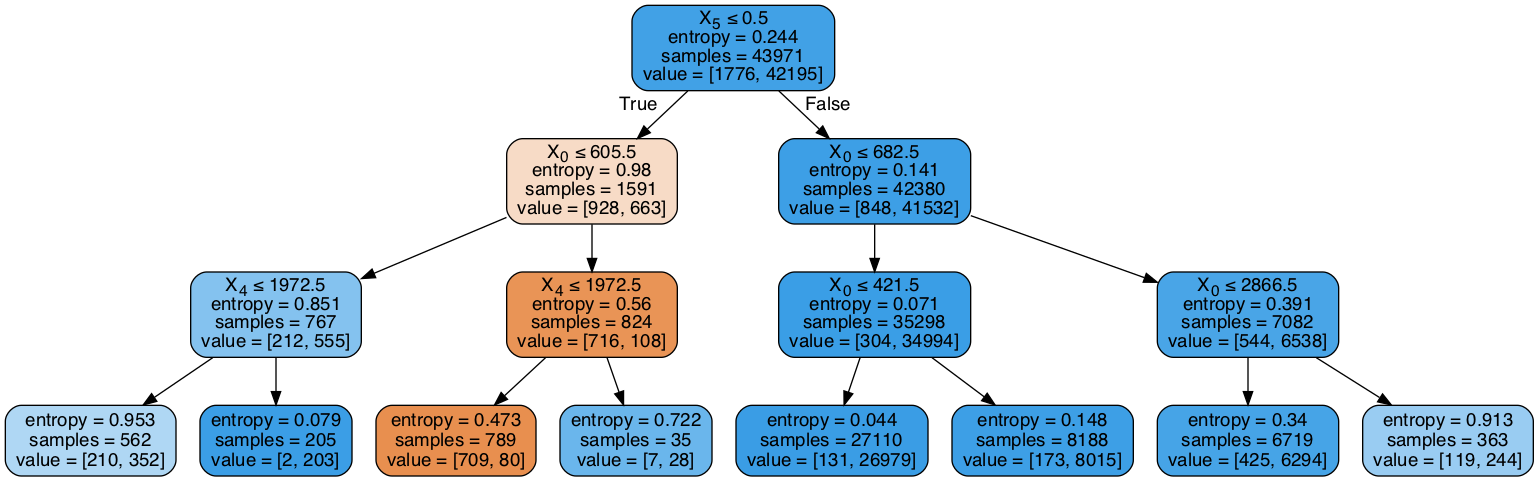

In [73]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [74]:
predicted_labels = dt_model.predict(dum_test.ix[:, :9])
dum_test['predicted_label_tree'] = predicted_labels
dum_test.sample(10)

,tripdur,start_st_id,end_st_id,bikeid,birth year,gender,month,year,hour,usertype_Customer,usertype_Subscriber,predicted_label_tree
11640,312,3270,3187,26264,1989.0,1,6,2017,6,0,1,1
21077,2375,3194,3194,29294,1994.0,1,8,2018,17,1,0,1
28894,170,3273,3185,31714,1984.0,1,12,2017,15,0,1,1
27197,259,3270,3186,26706,1990.0,2,10,2018,8,0,1,1
18241,911,3183,3639,26159,1971.0,1,7,2018,11,0,1,1
19261,197,3186,3213,29483,1970.0,1,9,2017,16,0,1,1
23470,1049,3212,3183,26257,1981.0,1,10,2017,8,0,1,1
16496,559,3202,3209,29673,1988.0,1,7,2018,7,0,1,1
7342,236,3194,3195,33575,1972.0,1,5,2018,7,0,1,1
5789,1494,3199,3199,29514,1991.0,1,4,2017,17,1,0,1


In [75]:
def comparePlot(input_frame,real_column,predicted_column):
    df_a = input_frame.copy()
    df_b = input_frame.copy()
    df_a['label_source'] = 'Subscribers?'
    df_b['label_source'] = 'User Type Prediction'
    df_a['label'] = df_a[real_column]
    df_b['label'] = df_b[predicted_column].apply(lambda x: 'Predict %s'%x)
    df_c = pd.concat((df_a, df_b), axis=0, ignore_index=True)
    sns.lmplot(x='start_st_id', y='end_st_id', col='label_source',
               hue='label', data=df_c, fit_reg=False, size=4);
    

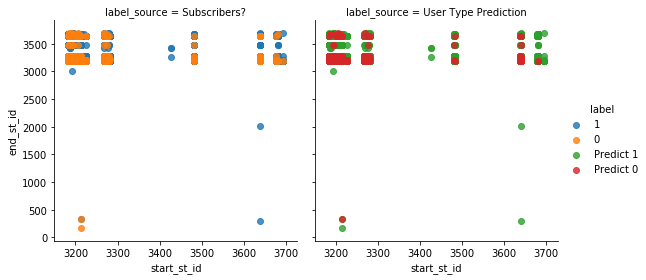

In [76]:
comparePlot(dum_test,"usertype_Subscriber","predicted_label_tree")



In [77]:
sub_true = dum_test['usertype_Subscriber']
sub_pred = dum_test['predicted_label_tree']
print(accuracy_score(sub_true, sub_pred))

0.9752188909525072


In [78]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(dum_train.ix[:,:9], dum_train.usertype_Subscriber)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [79]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }
# grid_clf = GridSearchCV(rf_model, param_grid, cv=3)
# grid_clf = GridSearchCV(rf_model, param_grid, cv=6)
grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(dum_train.ix[:,:9], dum_train.usertype_Subscriber)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
grid_clf.best_params_

{'max_depth': 9, 'n_estimators': 20}

In [81]:
# build a random forest
rf_model_optimal = skens.RandomForestClassifier(n_estimators=20, max_depth=9, oob_score=True, criterion='entropy')
rf_model.fit(dum_train.ix[:,:9], dum_train.usertype_Subscriber)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [82]:
predicted_labels = rf_model.predict(dum_test.ix[:, :9])
dum_test['predicted_rf_tree'] = predicted_labels

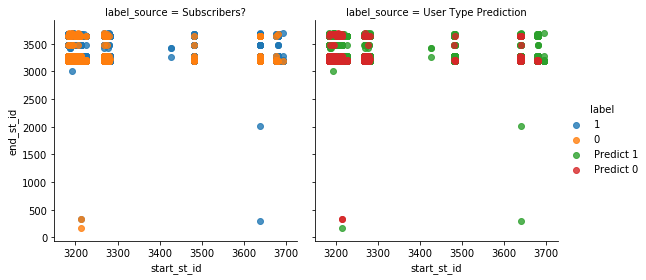

In [83]:
comparePlot(dum_test,"usertype_Subscriber","predicted_rf_tree")



In [84]:
sub_true = dum_test['usertype_Subscriber']
sub_pred = dum_test['predicted_rf_tree']
print(accuracy_score(sub_true, sub_pred))

0.9761740514725391


In [85]:
rf_model.feature_importances_

array([0.23670242, 0.07021701, 0.07071463, 0.09278296, 0.13160269,
       0.25767634, 0.05151891, 0.02357576, 0.06520929])

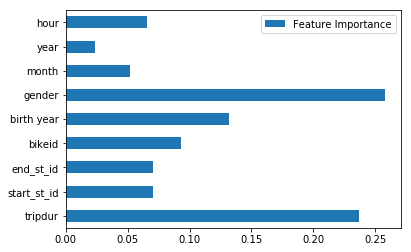

In [86]:
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=dum_train.columns[:9]).plot(kind='barh')

In [87]:
citi_pred = citi_clean.copy()
citi_pred.head()

,tripdur,start_st_id,end_st_id,bikeid,usertype,birth year,gender,month,year,hour
1,408,3202,3203,24461,Subscriber,1987.0,2,1,2017,23
2,472,3186,3192,24389,Subscriber,1973.0,1,1,2017,14
3,1469,3220,3198,26263,Subscriber,1988.0,1,1,2017,15
4,404,3202,3203,26232,Subscriber,1987.0,2,1,2017,21
5,364,3203,3185,24581,Subscriber,1978.0,1,1,2017,9


In [88]:
citi_pred['is_subs'] = np.where(citi_pred.usertype == 'Subscriber', 'sub', 'not_sub')
citi_pred.sample(20)

,tripdur,start_st_id,end_st_id,bikeid,usertype,birth year,gender,month,year,hour,is_subs
1520,125,3279,3211,26232,Subscriber,1976.0,0,2,2017,12,sub
5350,1097,3187,3187,29524,Subscriber,1990.0,1,4,2018,13,sub
2323,233,3273,3203,31689,Subscriber,1958.0,1,2,2018,18,sub
3788,222,3279,3186,24665,Subscriber,1982.0,1,3,2017,9,sub
6705,271,3194,3195,26312,Subscriber,1984.0,1,5,2017,8,sub
14315,196,3186,3205,26276,Subscriber,1981.0,1,6,2018,18,sub
20776,603,3220,3210,26206,Subscriber,1988.0,1,8,2018,16,sub
16456,324,3207,3195,29226,Subscriber,1989.0,1,8,2017,8,sub
31075,357,3276,3639,29285,Subscriber,1984.0,2,11,2018,8,sub
7987,650,3205,3269,29280,Subscriber,1993.0,2,5,2017,8,sub


In [89]:
citi_train,citi_test = train_test_split(citi_pred,test_size=0.3)

In [90]:
# train the model
gnb_model = sknb.GaussianNB()
gnb_model.fit(citi_train[['tripdur']],citi_train['is_subs'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
y_pred = gnb_model.predict(citi_test[['tripdur']])
citi_test['predicted_nb'] = y_pred

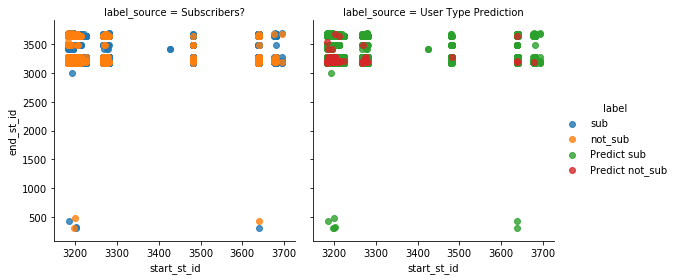

In [92]:
comparePlot(citi_test,'is_subs',"predicted_nb")

In [93]:
sub_true = citi_test['is_subs']
sub_pred = citi_test["predicted_nb"]
print(accuracy_score(sub_true, sub_pred))

0.9602547094720085


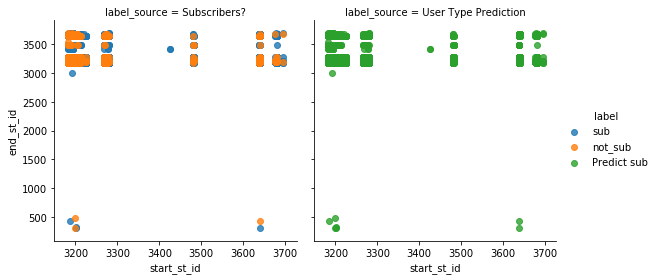

In [94]:
# train the model
gnb_model = sknb.GaussianNB()
# given sepal length, predict if setosa
gnb_model.fit(citi_train[['gender']],citi_train['is_subs'])
# test the model
y_pred = gnb_model.predict(citi_test[['gender']])
citi_test['predicted_nb'] = y_pred
comparePlot(citi_test,'is_subs',"predicted_nb")

In [95]:
sub_true = citi_test['is_subs']
sub_pred = citi_test["predicted_nb"]
print(accuracy_score(sub_true, sub_pred))

0.9604669673653489
